In [1]:
# import the required libraries along with other libraries
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import datetime

plt.style.use('ggplot')

In [3]:
df_tesla = pdr.get_data_yahoo("TSLA")
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-16,23.000000,22.320000,22.502666,22.670668,97114500.0,22.670668
2018-01-17,23.266666,22.650000,22.698000,23.143999,106552500.0,23.143999
2018-01-18,23.486668,22.916000,23.044666,22.971333,85287000.0,22.971333
2018-01-19,23.372667,22.840000,23.000000,23.334667,73324500.0,23.334667
2018-01-22,23.855333,23.280001,23.293333,23.437332,93156000.0,23.437332


## `Simple Moving Average (SMA)`

rolling() method

**Documentation -->** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

**It helps to smoothing the graphs.**

In [7]:
df_tesla["Open"].rolling(window=5).mean().head()

Date
2018-01-16          NaN
2018-01-17          NaN
2018-01-18          NaN
2018-01-19          NaN
2018-01-22    22.907733
Name: Open, dtype: float64

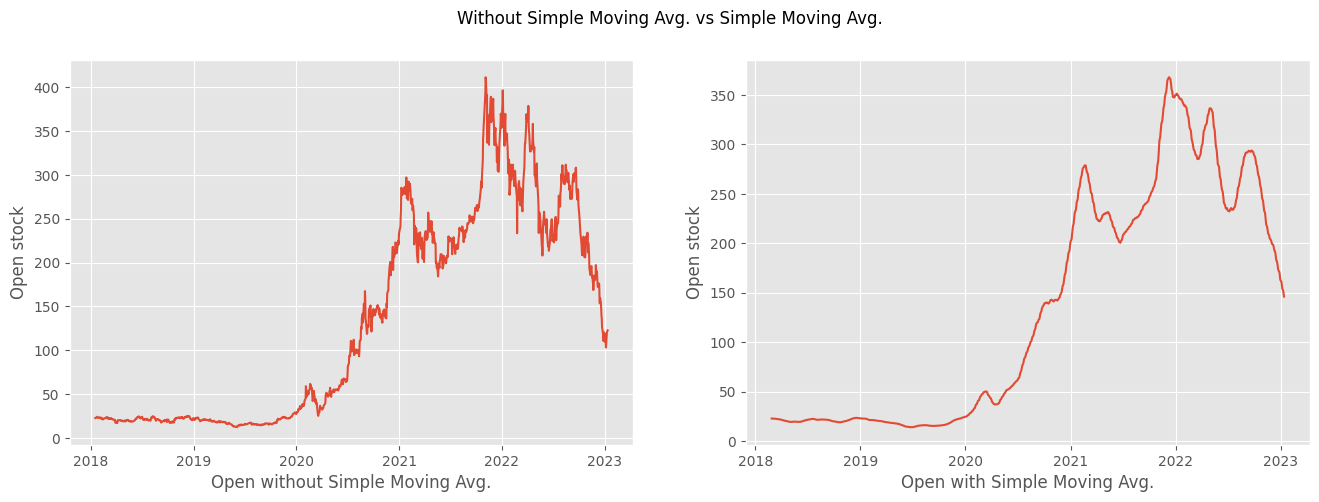

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(df_tesla["Open"])
axs[0].set_xlabel("Open without Simple Moving Avg.")
axs[0].set_ylabel("Open stock")

axs[1].plot(df_tesla["Open"].rolling(window=30).mean())
axs[1].set_xlabel("Open with Simple Moving Avg.")
axs[1].set_ylabel("Open stock")

plt.suptitle("Without Simple Moving Avg. vs Simple Moving Avg.")
plt.show()

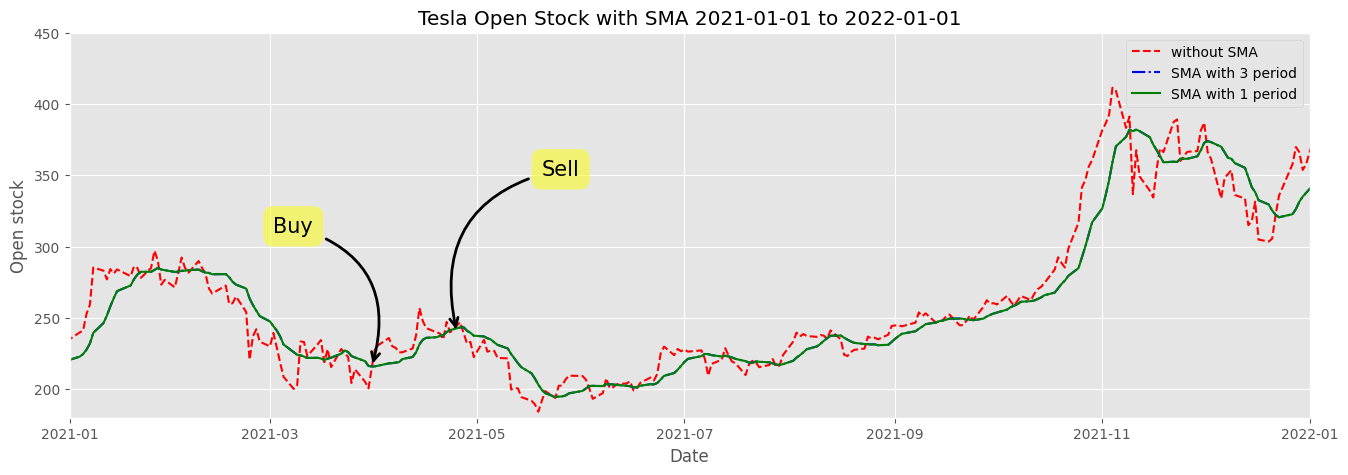

In [68]:
fig = plt.figure(figsize=(16, 5))

# function to add arrow on a graph arrowprops draws an arrow between xy and xytext
plt.annotate('Buy',
    xy=(datetime.date(2021, 3, 31), 216), 
    xytext=(datetime.date(2021, 3, 2), 310),
    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
    fontsize=15,
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle='arc3,rad=-0.5', 
        color='black',
        lw=2
    )
)
plt.annotate('Sell',
    xy=(datetime.date(2021, 4, 25), 240), 
    xytext=(datetime.date(2021, 5, 20), 350),
    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
    fontsize=15,
    arrowprops=dict(
        arrowstyle='->',
        connectionstyle='arc3,rad=0.5', 
        color='black',
        lw=2
    )
)

plt.plot(df_tesla["Open"], c="red", label="without SMA", linestyle="--")
plt.plot(df_tesla["Open"].rolling(window=10, min_periods=10).mean(), c="blue", label="SMA with 3 period", linestyle="-.")
plt.plot(df_tesla["Open"].rolling(window=10, min_periods=1).mean(), c="green", label="SMA with 1 period", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Open stock")
plt.title("Tesla Open Stock with SMA 2021-01-01 to 2022-01-01")
plt.legend()
plt.xlim([datetime.date(2021, 1, 1), datetime.date(2022, 1, 1)])
plt.ylim([180, 450])
plt.show()

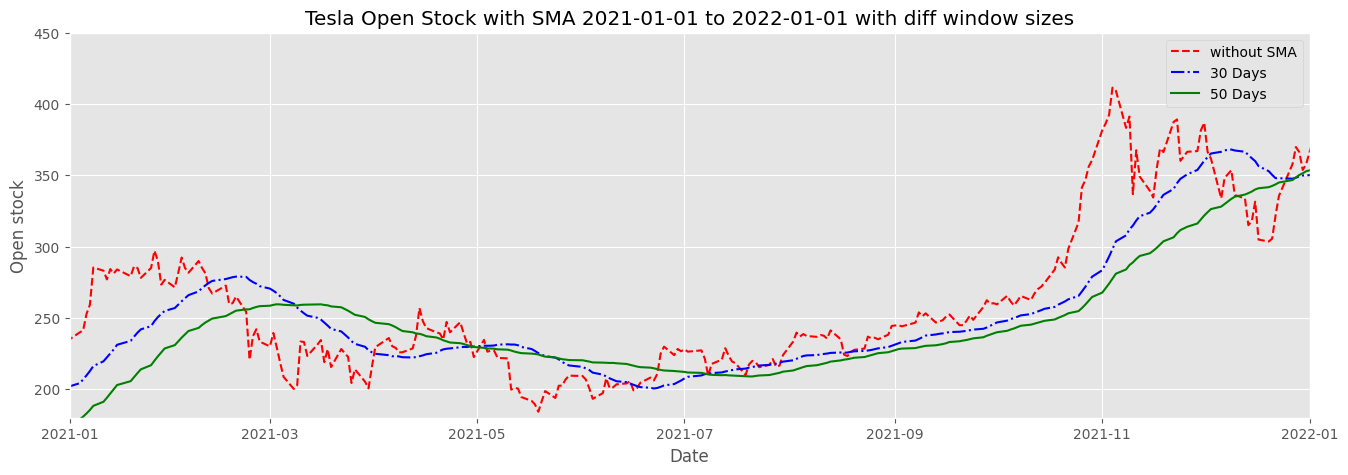

In [71]:
fig = plt.figure(figsize=(16, 5))

plt.plot(df_tesla["Open"], c="red", label="without SMA", linestyle="--")
plt.plot(df_tesla["Open"].rolling(window=30).mean(), c="blue", label="30 Days", linestyle="-.")
plt.plot(df_tesla["Open"].rolling(window=50).mean(), c="green", label="50 Days", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Open stock")
plt.title("Tesla Open Stock with SMA 2021-01-01 to 2022-01-01 with diff window sizes")
plt.legend()
plt.xlim([datetime.date(2021, 1, 1), datetime.date(2022, 1, 1)])
plt.ylim([180, 450])
plt.show()

**Disadvantages:**
- Based on the window size you have specified, all the dat dring calculation have similar importance. So, the old data have similar weitage compared to the recent data.

## `Cummulative Moving Average (CMA)`:

| Open | Cummulative Moving Average | Result |
| :--: | :--: | :--: |
| 12 | NaN | NaN |
| 13 | $\frac{12+13}{2}$ | ${12.5}$ |
| 11 | $\frac{12+13+11}{3}$ | ${12}$ |
| 15 | $\frac{12+13+11+15}{4}$ | ${12.75}$ |
| 16 | $\frac{12+13+11+15+16}{5}$ | ${13.4}$ |
| 10 | $\frac{12+13+11+15+16+10}{6}$ | ${12.84}$ |

In [74]:
## expanding

df_tesla["Open"].expanding().mean()

Expanding [min_periods=1,center=False,axis=0,method=single]

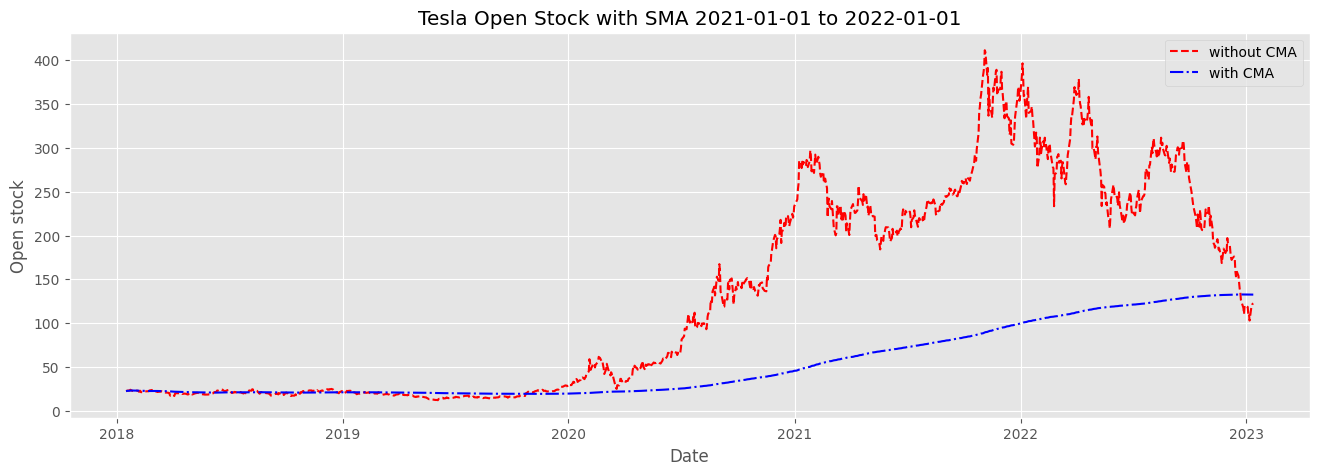

In [79]:
fig = plt.figure(figsize=(16, 5))

plt.plot(df_tesla["Open"], c="red", label="without CMA", linestyle="--")
plt.plot(df_tesla["Open"].expanding().mean(), c="blue", linestyle="-.", label="with CMA")
plt.xlabel("Date")
plt.ylabel("Open stock")
plt.title("Tesla Open Stock with SMA 2021-01-01 to 2022-01-01")
plt.legend()
plt.show()

## `Exponential Moving Average (EMA)`

In [80]:
df_tesla["Open"].ewm(alpha=0.1, adjust=False).mean()

Date
2018-01-16     22.502666
2018-01-17     22.522200
2018-01-18     22.574446
2018-01-19     22.617002
2018-01-22     22.684635
                 ...    
2023-01-06    133.585392
2023-01-09    132.122853
2023-01-10    131.017568
2023-01-11    130.124810
2023-01-12    129.368329
Name: Open, Length: 1258, dtype: float64

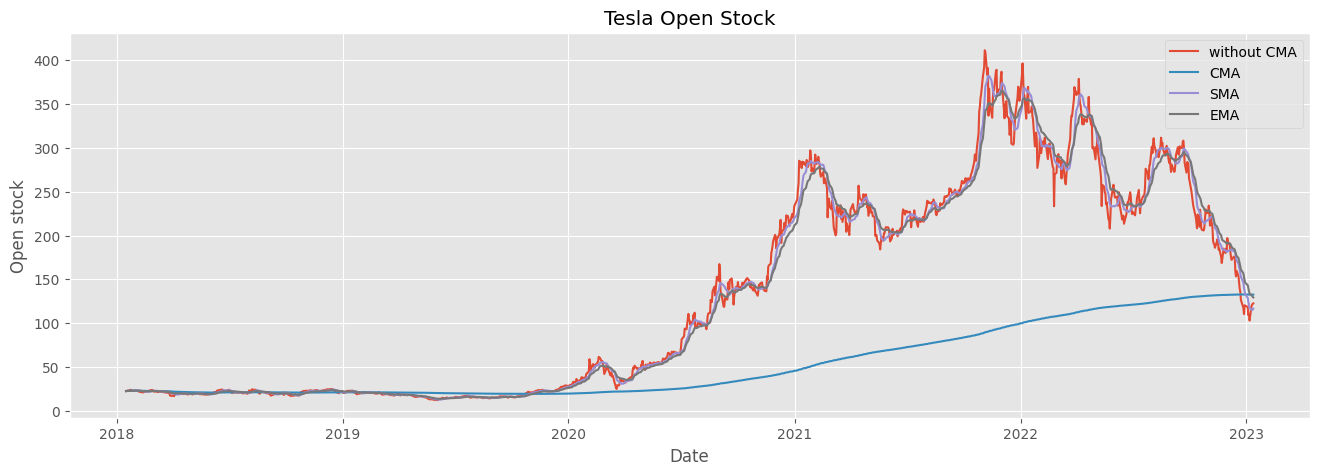

In [87]:
fig = plt.figure(figsize=(16, 5))

plt.plot(df_tesla["Open"], label="without CMA")
plt.plot(df_tesla["Open"].expanding().mean(), label="CMA")
plt.plot(df_tesla["Open"].rolling(window=10).mean(), label="SMA")
plt.plot(df_tesla["Open"].ewm(alpha=0.1, adjust=False).mean(), label="EMA")
plt.xlabel("Date")
plt.ylabel("Open stock")
plt.title("Tesla Open Stock")
plt.legend()
plt.show()

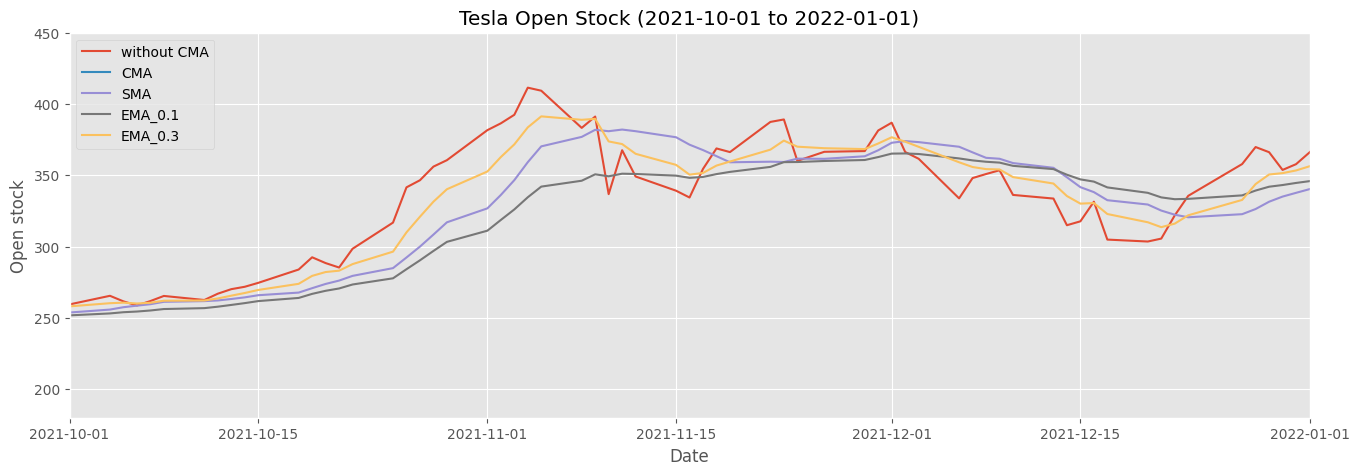

In [90]:
fig = plt.figure(figsize=(16, 5))

plt.plot(df_tesla["Open"], label="without CMA")
plt.plot(df_tesla["Open"].expanding().mean(), label="CMA")
plt.plot(df_tesla["Open"].rolling(window=10).mean(), label="SMA")
plt.plot(df_tesla["Open"].ewm(alpha=0.1, adjust=False).mean(), label="EMA_0.1")
plt.plot(df_tesla["Open"].ewm(alpha=0.3, adjust=False).mean(), label="EMA_0.3")
plt.xlabel("Date")
plt.ylabel("Open stock")
plt.title("Tesla Open Stock (2021-10-01 to 2022-01-01)")
plt.xlim([datetime.date(2021, 10, 1), datetime.date(2022, 1, 1)])
plt.ylim([180, 450])
plt.legend()
plt.show()

## `Exponential Weighted Moving Average (EWMA):`

In [92]:
df_tesla["Open"].ewm(span=5, adjust=False).mean()

Date
2018-01-16     22.502666
2018-01-17     22.567778
2018-01-18     22.726741
2018-01-19     22.817827
2018-01-22     22.976329
                 ...    
2023-01-06    110.885354
2023-01-09    113.576903
2023-01-10    116.074602
2023-01-11    118.079733
2023-01-12    119.573155
Name: Open, Length: 1258, dtype: float64

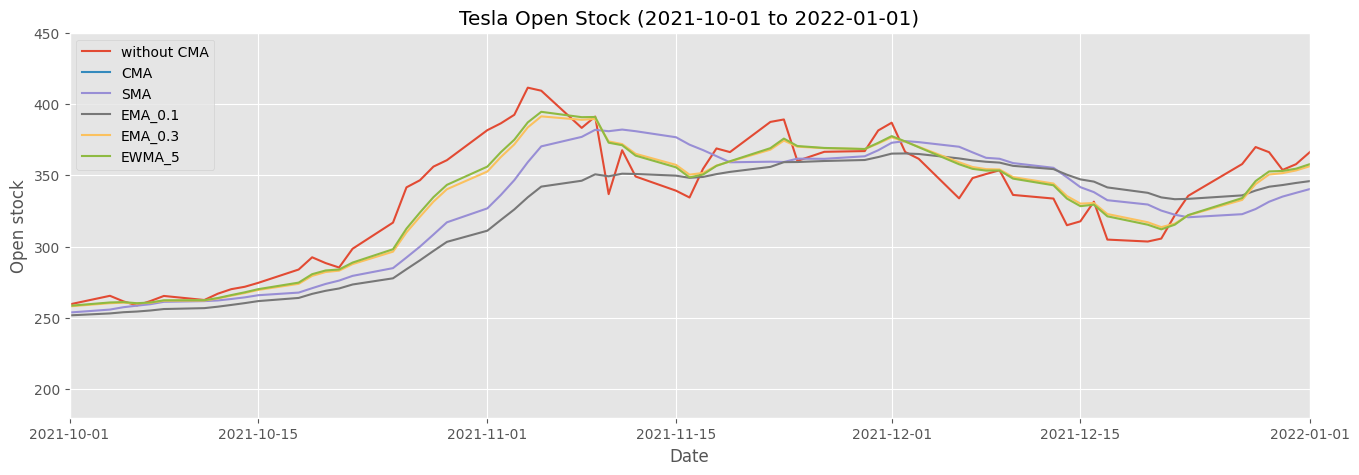

In [93]:
fig = plt.figure(figsize=(16, 5))

plt.plot(df_tesla["Open"], label="without CMA")
plt.plot(df_tesla["Open"].expanding().mean(), label="CMA")
plt.plot(df_tesla["Open"].rolling(window=10).mean(), label="SMA")
plt.plot(df_tesla["Open"].ewm(alpha=0.1, adjust=False).mean(), label="EMA_0.1")
plt.plot(df_tesla["Open"].ewm(alpha=0.3, adjust=False).mean(), label="EMA_0.3")
plt.plot(df_tesla["Open"].ewm(span=5, adjust=False).mean(), label="EWMA_5")
plt.xlabel("Date")
plt.ylabel("Open stock")
plt.title("Tesla Open Stock (2021-10-01 to 2022-01-01)")
plt.xlim([datetime.date(2021, 10, 1), datetime.date(2022, 1, 1)])
plt.ylim([180, 450])
plt.legend()
plt.show()

## `ARIMA`

- **AR =** Auto regresion
- **MA =** Moving Average 
- **AR --> I <-- MA =** Good for forcasting (Sales, Monthly Production but not good for stocks)

### Moving Average Models